Import required libraries

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

from lib import ess_gen_farina, ess_parse_farina

Create Exponential Sine Sweep from parameters

In [39]:
fs = 48000  # Sampling Frequency [Hz]

f1 = 20  # Initial frequency [Hz]
f2 = fs // 2  # Final frequency [Hz]

T_sweep = 10  # Sweep duration [sec.]
T_idle = 3  # Idle duration [sec.]

fade_in = int(0.100 * fs)  # fade-in window of 100 ms [samples]

t_sweep = np.arange(0, (T_sweep + T_idle) * fs) / fs  # Time vector [sec.]

Generate exponential sine sweep and its inverse filter

In [40]:
sweep, inverse = ess_gen_farina(
    f1, f2, T_sweep, T_idle, fs, fade_in=fade_in, cut_zerocross=True
)

Perform deconvolution with measured sweep

In [41]:
measured_sweep = sweep

rir = ess_parse_farina(measured_sweep, inverse, T_sweep, T_idle, fs, causality=True)
# sf.write("rir.wav", rir, fs, subtype="PCM_24")

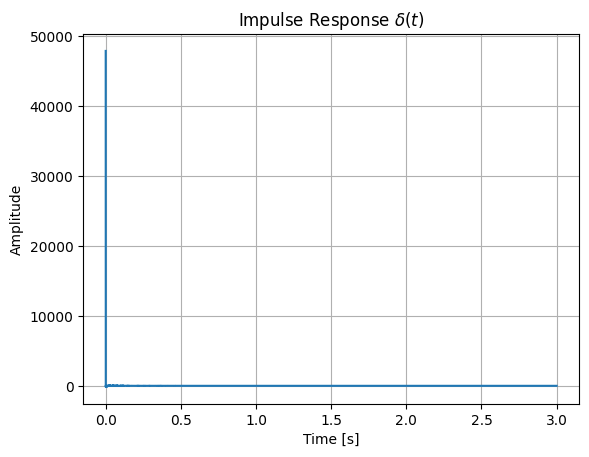

In [42]:
plt.figure()
t = np.arange(0, T_idle * fs) / fs
plt.plot(t, rir)
plt.title("Impulse Response $\\delta(t)$")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

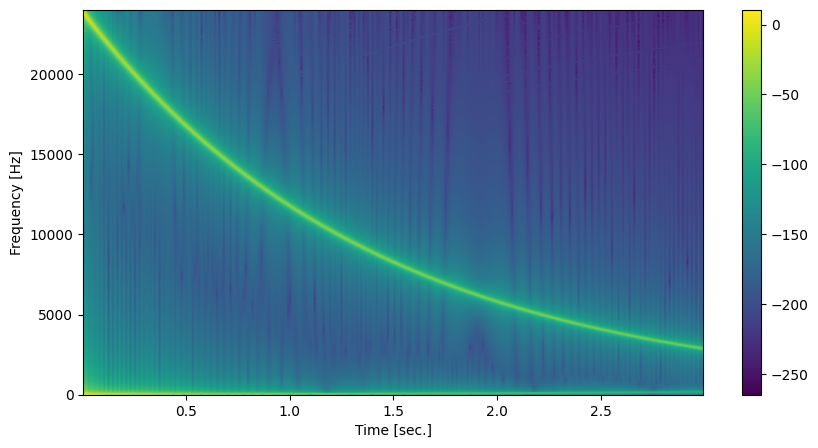

In [43]:
# plot Spectrogram of rir
plt.figure(figsize=(10, 5))
plt.specgram(rir, NFFT=1024, Fs=fs, noverlap=512)
plt.xlabel("Time [sec.]")
plt.ylabel("Frequency [Hz]")
plt.colorbar()
plt.savefig("rir_spec.png", bbox_inches="tight")
plt.show()

In [44]:
# read wav file
rir, fs = sf.read("../s1_r1_o.wav") # rir: [samples, channels]
rir = rir[:, 0] # left channel

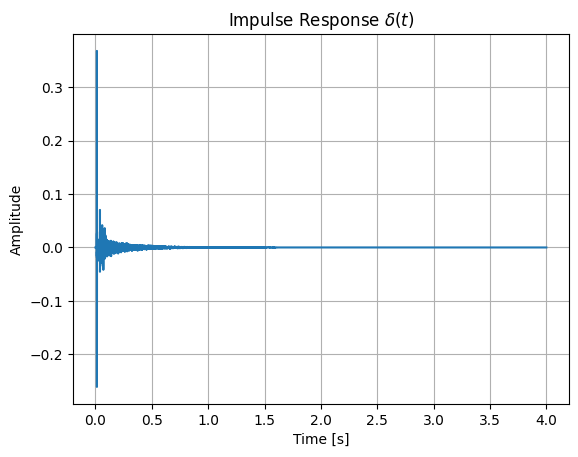

In [45]:
plt.figure()
t = np.arange(0, len(rir)) / fs
plt.plot(t, rir)
plt.title("Impulse Response $\\delta(t)$")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

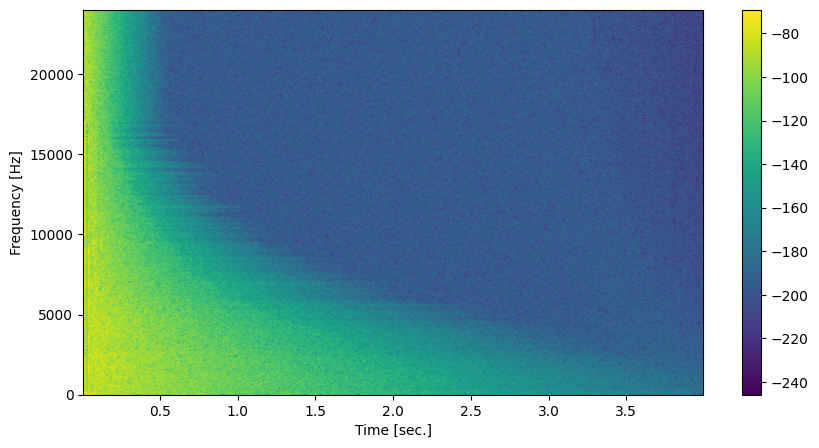

In [46]:
# plot Spectrogram of rir
plt.figure(figsize=(10, 5))
plt.specgram(rir, NFFT=1024, Fs=fs, noverlap=512)
plt.xlabel("Time [sec.]")
plt.ylabel("Frequency [Hz]")
plt.colorbar()
plt.savefig("rir_spec.png", bbox_inches="tight")
plt.show()

In [47]:
measured_sweep = sf.read("../fixed_position_sinesweep\micA_s1_p00.wav")[0]

In [52]:
rir = ess_parse_farina(measured_sweep, inverse, T_sweep, T_idle, fs, causality=True)
sf.write("rir.wav", rir, fs, subtype="FLOAT")

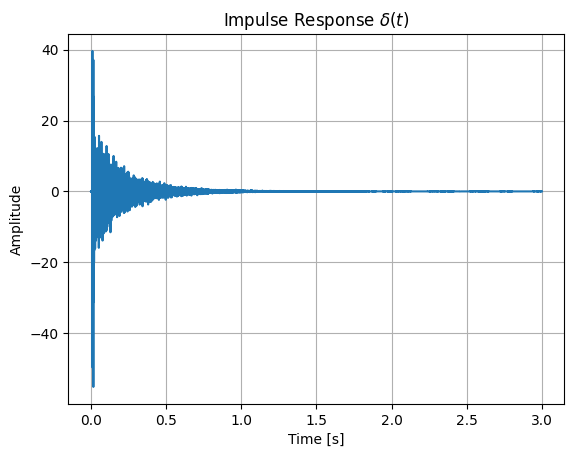

In [49]:
plt.figure()
t = np.arange(0, len(rir)) / fs
plt.plot(t, rir)
plt.title("Impulse Response $\\delta(t)$")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

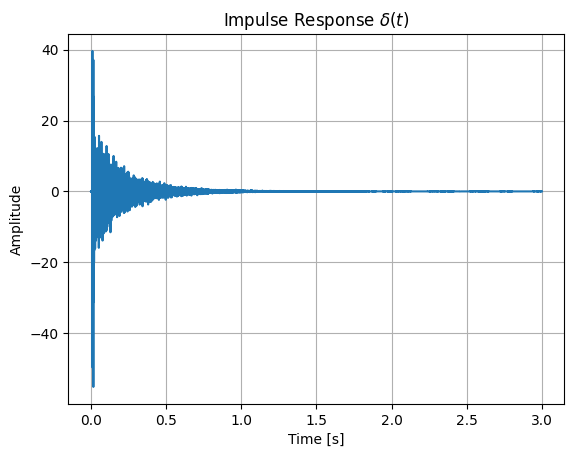

In [53]:
rir = sf.read("rir.wav")[0]
time = np.arange(0, len(rir)) / fs
plt.figure()
plt.plot(time, rir)
plt.title("Impulse Response $\\delta(t)$")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

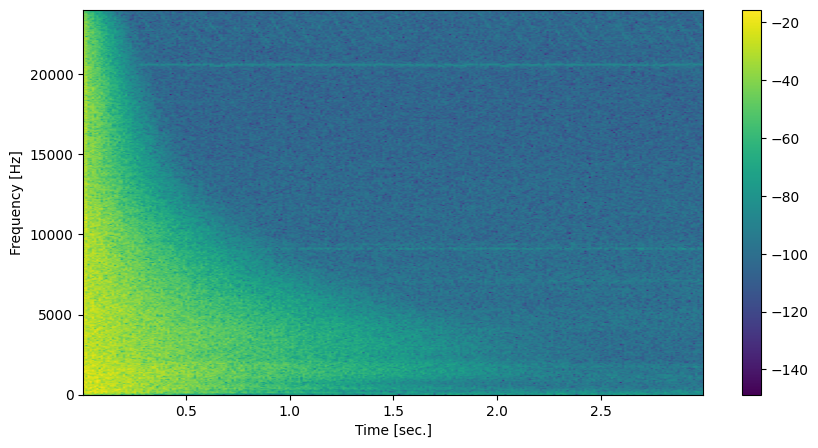

In [ ]:
# plot Spectrogram of rir
plt.figure(figsize=(10, 5))
plt.specgram(rir, NFFT=1024, Fs=fs, noverlap=512)
plt.xlabel("Time [sec.]")
plt.ylabel("Frequency [Hz]")
plt.colorbar()
plt.savefig("rir_spec.png", bbox_inches="tight")
plt.show()

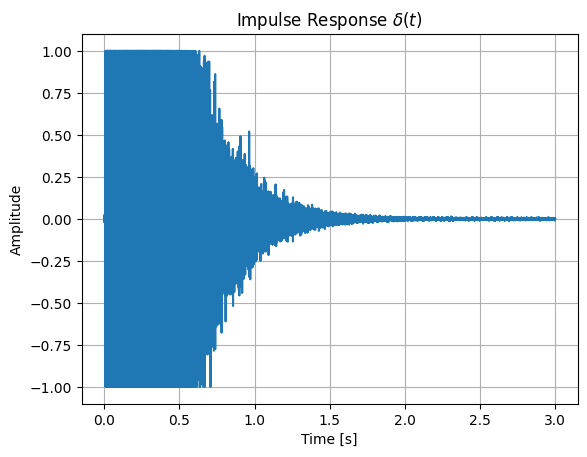

In [ ]:
rir = sf.read("../RIRs\s1_p00_m1.wav")[0]
time = np.arange(0, len(rir)) / fs
plt.figure()
plt.plot(time, rir)
plt.title("Impulse Response $\\delta(t)$")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()